<a href="https://colab.research.google.com/github/sfpnchk/SKELAR-Analytics-Intensive/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [38]:
url = 'https://raw.githubusercontent.com/sfpnchk/SKELAR-Analytics-Intensive/refs/heads/main/Task_2.csv'
events = pd.read_csv(url)
events.head()

,moderator,id_request,request_time,start_time,finish_time,team
0,165,159660,2020-09-24 7:01:16,2020-10-01 16:00:31,2020-10-01 16:02:02,retail
1,178,160116,2020-09-24 22:32:15,2020-10-01 13:21:42,2020-10-01 13:21:43,retail
2,187,160178,2020-09-25 2:58:13,2020-10-02 11:37:16,2020-10-02 11:41:56,wholesale
3,178,160306,2020-09-25 9:44:12,2020-10-02 7:23:09,2020-10-02 7:25:33,retail
4,178,163042,2020-09-30 15:56:08,2020-10-02 7:37:33,2020-10-02 7:47:57,retail


In [39]:
#змінимо тип для колонок, які містять час з str на datetime
events['request_time'] = pd.to_datetime(events['request_time'])
events['start_time'] = pd.to_datetime(events['start_time'])
events['finish_time'] = pd.to_datetime(events['finish_time'])


#час в черзі на обробку (від запиту до початку обробки)
events['time_in_queue_mins'] = (events['start_time'] - events['request_time']).dt.total_seconds() / 60

#час обробки
events['handling_time_mins'] = (events['finish_time'] - events['start_time']).dt.total_seconds() / 60

#час відповіді (від запиту до закінчення обробки)
events['full_response_time_mins'] = (events['finish_time'] - events['request_time']).dt.total_seconds() / 60

events.head()

,moderator,id_request,request_time,start_time,finish_time,team,time_in_queue_mins,handling_time_mins,full_response_time_mins
0,165,159660,2020-09-24 07:01:16,2020-10-01 16:00:31,2020-10-01 16:02:02,retail,10619.250000,1.516667,10620.766667
1,178,160116,2020-09-24 22:32:15,2020-10-01 13:21:42,2020-10-01 13:21:43,retail,9529.450000,0.016667,9529.466667
2,187,160178,2020-09-25 02:58:13,2020-10-02 11:37:16,2020-10-02 11:41:56,wholesale,10599.050000,4.666667,10603.716667
3,178,160306,2020-09-25 09:44:12,2020-10-02 07:23:09,2020-10-02 07:25:33,retail,9938.950000,2.400000,9941.350000
4,178,163042,2020-09-30 15:56:08,2020-10-02 07:37:33,2020-10-02 07:47:57,retail,2381.416667,10.400000,2391.816667


In [40]:
general_metrics = {
    "Середній час в черзі (хв)": round(events['time_in_queue_mins'].mean(), 2),
    "Медіанний час в черзі (хв)": round(events['time_in_queue_mins'].median(), 2),
    "% відповідей > 45 хв": round((events['full_response_time_mins'] > 45).mean() * 100, 2),
    "Середній час обробки (хв)": round(events['handling_time_mins'].mean(), 2)
}
for key, value in general_metrics.items():
    print(f"{key}: {value}")

Середній час в черзі (хв): 2468.73
Медіанний час в черзі (хв): 497.62
% відповідей > 45 хв: 79.27
Середній час обробки (хв): 2.24


In [41]:
team_metrics = events.groupby('team').agg(
    Середній_час_в_черзі = ('time_in_queue_mins', 'mean'),
    Медіанний_час_в_черзі = ('time_in_queue_mins', 'median'),
    Відсоток_відповідей_понад_45_хв = ('full_response_time_mins', lambda x: (x > 45).mean() * 100),
    Середній_час_обробки = ('handling_time_mins', 'mean'),
    Кількість_запитів = ('id_request', 'count')).round(2).reset_index()

print(team_metrics)

        team  Середній_час_в_черзі  Медіанний_час_в_черзі  \
0     retail                607.79                  48.38   
1  wholesale               3677.49                3749.77   

   Відсоток_відповідей_понад_45_хв  Середній_час_обробки  Кількість_запитів  
0                            54.96                  1.98              14025  
1                            95.05                  2.42              21592  


<ipython-input-45-a0df70dd3a3e>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=events, x='team', y='full_response_time_mins', estimator=np.mean, ci=None, palette='Set2')
<ipython-input-45-a0df70dd3a3e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=events, x='team', y='full_response_time_mins', estimator=np.mean, ci=None, palette='Set2')


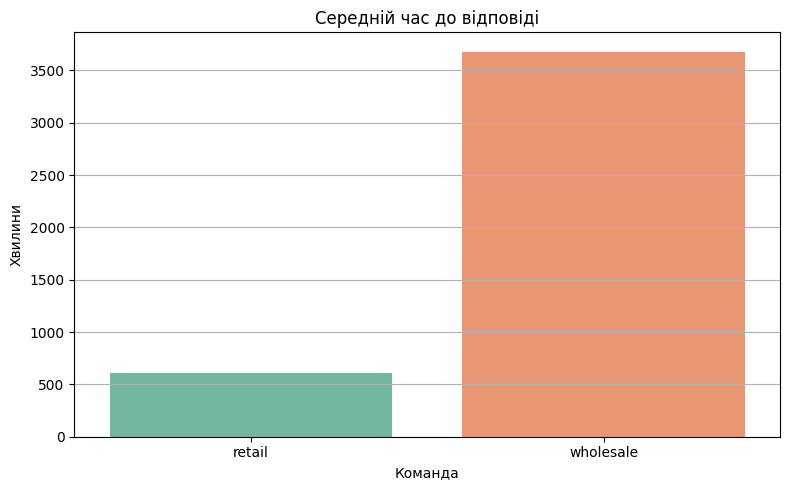

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))
sns.barplot(data=events, x='team', y='full_response_time_mins', estimator=np.mean, ci=None, palette='Set2')
plt.title('Середній час до відповіді')
plt.xlabel('Команда')
plt.ylabel('Хвилини')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Як показує діаграма, команда retail в 6 разів швидше надає відповідь, ніж whosale

<ipython-input-48-539febd5919d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=events, x='team', y='handling_time_mins', estimator=np.mean, ci=None, palette='Set2')
<ipython-input-48-539febd5919d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=events, x='team', y='handling_time_mins', estimator=np.mean, ci=None, palette='Set2')


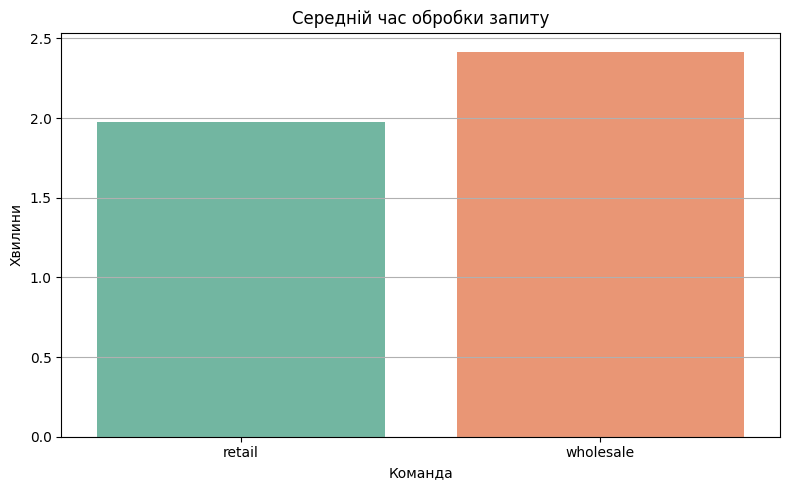

In [48]:
plt.figure(figsize=(8, 5))
sns.barplot(data=events, x='team', y='handling_time_mins', estimator=np.mean, ci=None, palette='Set2')
plt.title('Середній час обробки запиту')
plt.xlabel('Команда')
plt.ylabel('Хвилини')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Діаграма вище показує, що обидві команди чудово справляються з обробкою запитів, а саме вкладаються в час (до 5 хв).

#### Так як поперденій графік (середній час до відповіді) показував погані показники команд, а даний графік, показує, що запити обробляються командами швидко, то є сенс поглянути графік середнього часу в черзі

<ipython-input-50-ff06c30bbb67>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=events, x='team', y='time_in_queue_mins', estimator=np.mean, ci=None, palette='Set2')
<ipython-input-50-ff06c30bbb67>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=events, x='team', y='time_in_queue_mins', estimator=np.mean, ci=None, palette='Set2')


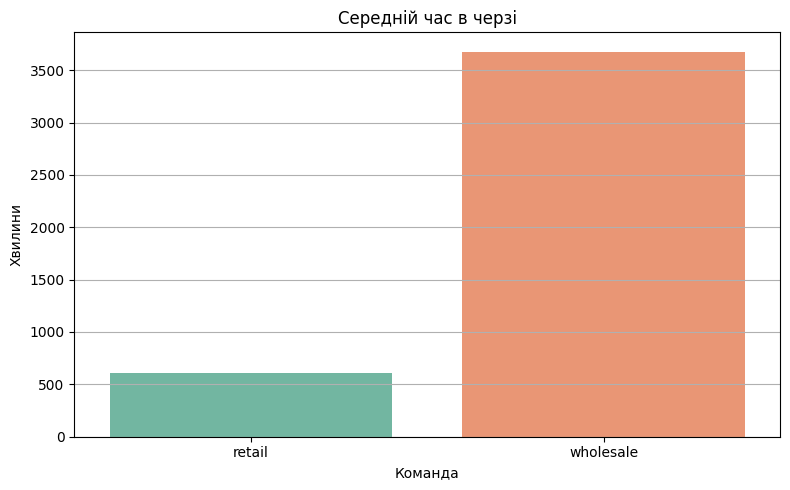

In [50]:
plt.figure(figsize=(8, 5))
sns.barplot(data=events, x='team', y='time_in_queue_mins', estimator=np.mean, ci=None, palette='Set2')
plt.title('Середній час в черзі')
plt.xlabel('Команда')
plt.ylabel('Хвилини')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### З даної діаграми можна зробити виснвоки, що погані показники саме через довге переюування запитів в черзі. У команди retail цей час в 6 разів менший, ніж в wholesale.

####  Також варто відмити, різницю в кількості запитів. Команда wholesale має в півтора рази більше запитів ніж retail

<ipython-input-53-bf8ca3068396>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=long_waiting, x='team', y='full_response_time_mins', palette='Set3')


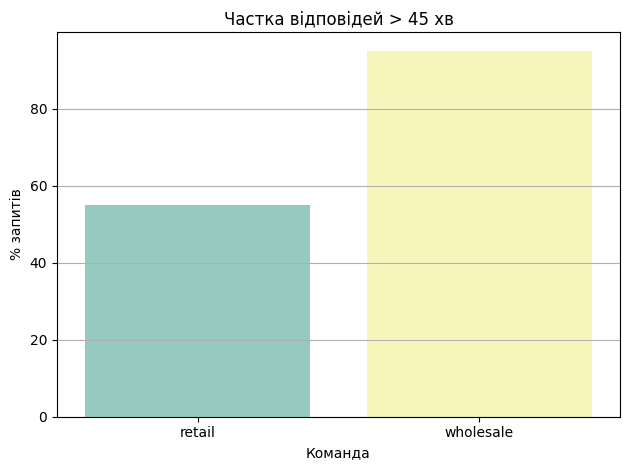

In [53]:
long_waiting = events.groupby('team')['full_response_time_mins'].apply(lambda x: (x > 45).mean() * 100).reset_index()

sns.barplot(data=long_waiting, x='team', y='full_response_time_mins', palette='Set3')
plt.title('Частка відповідей > 45 хв')
plt.ylabel('% запитів')
plt.xlabel('Команда')
plt.tight_layout()
plt.grid(axis='y')

### Аналізуючи діаграму вище, можна зробити висновок, що близько 95% запитів у команди wholesale займають більше 45 хвилин на обробку. У команди retail даний показник становить 53%.

In [60]:
# подивимося показники агентів
moderators_performance = events.groupby('moderator').agg(
    Кількість_запитів=('id_request', 'count'),
    Середній_час_відповіді=('full_response_time_mins', 'mean'),
    Середній_час_в_черзі=('time_in_queue_mins', 'mean'),
    Середній_час_обробки=('handling_time_mins', 'mean'),
).sort_values(by='Кількість_запитів', ascending=True).head(10).round(2)

print(moderators_performance)

           Кількість_запитів  Середній_час_відповіді  Середній_час_в_черзі  \
moderator                                                                    
110                        1                    8.43                  7.13   
129                        1                    2.92                  0.03   
138                        1                    0.33                  0.13   
171                        1                    2.87                  2.85   
133                        2                  449.72                439.00   
126                        2                 5997.00               5996.45   
134                        8                    1.92                  1.11   
150                       16                  121.62                116.51   
185                       25                 1208.89               1205.83   
114                       60                   75.66                 73.08   

           Середній_час_обробки  
moderator                    

<ipython-input-77-67159b724dac>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_response, x='moderator', y='avg_response_time_mins', palette='Reds_r')
<ipython-input-77-67159b724dac>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_handling, x='moderator', y='avg_handling_time_mins', palette='Oranges')
<ipython-input-77-67159b724dac>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_load, x='moderator', y='total_requests', palette='Blues')


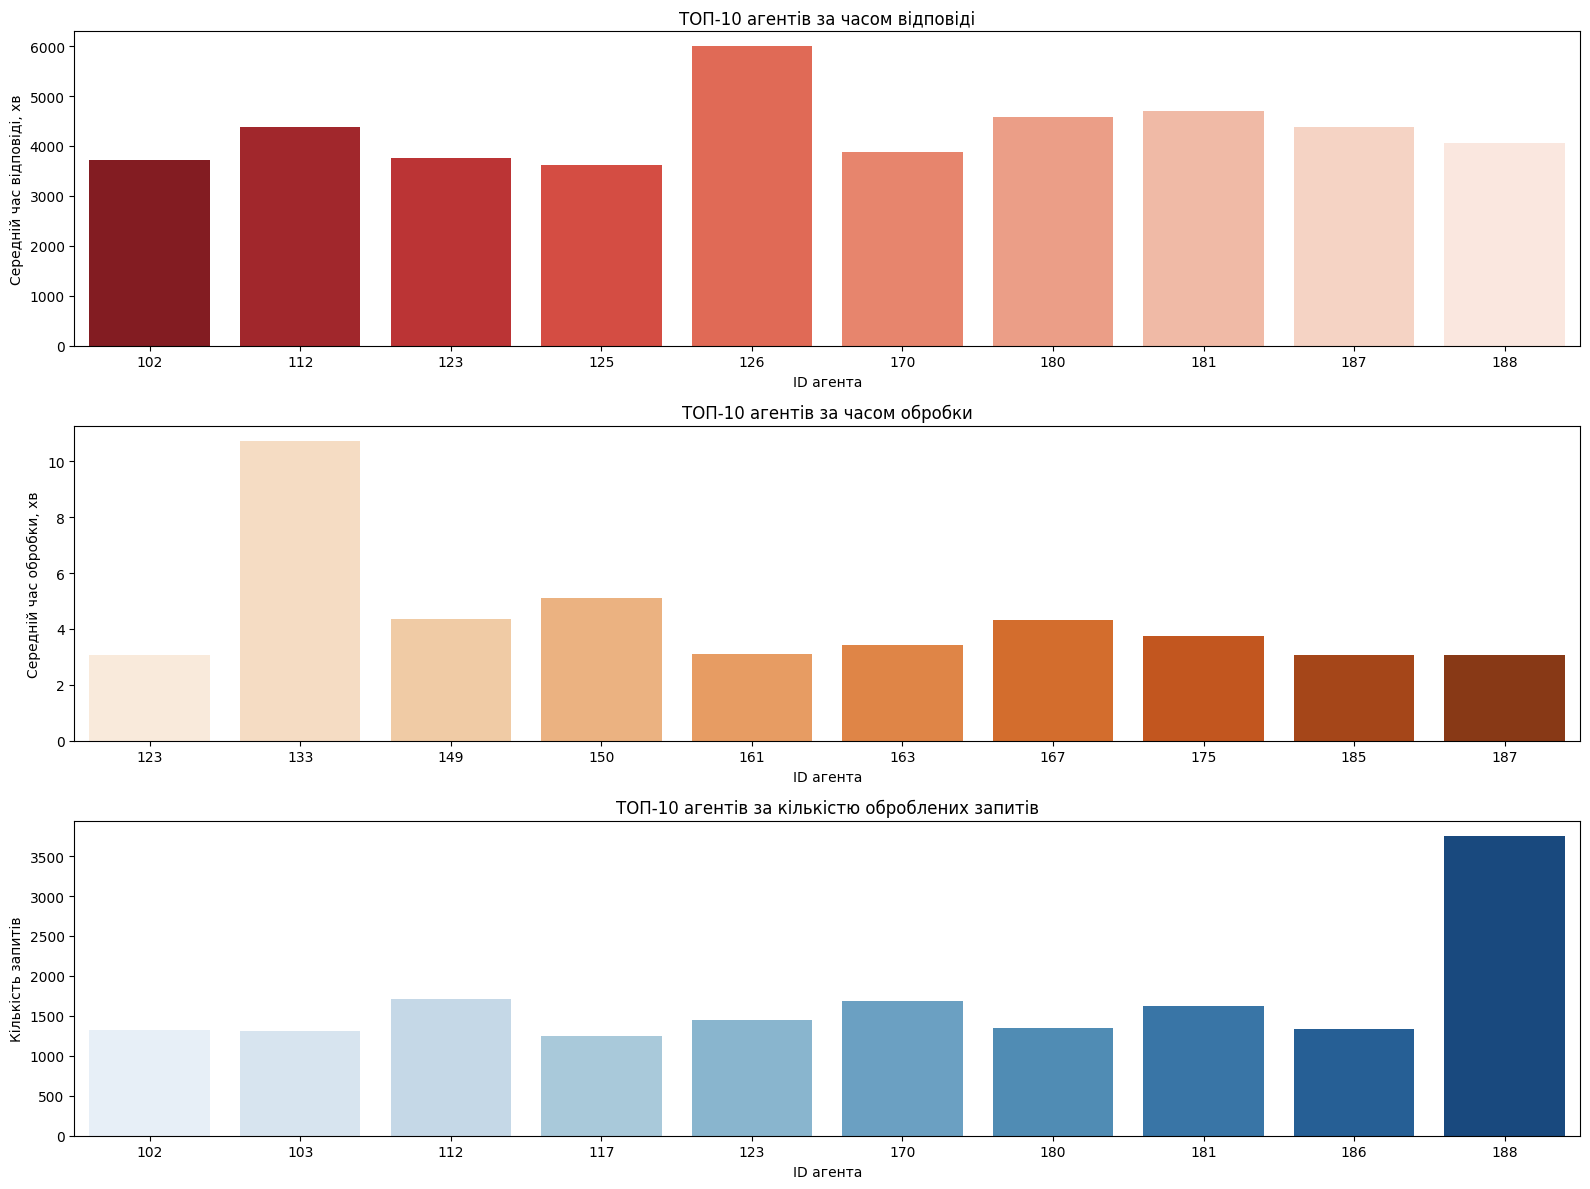

In [77]:
moderator_perf = events.groupby('moderator').agg(
    total_requests=('id_request', 'count'),
    avg_response_time_mins=('full_response_time_mins', 'mean'),
    avg_handling_time_mins=('handling_time_mins', 'mean')
).reset_index()


top_response = moderator_perf.sort_values('avg_response_time_mins', ascending=False).head(10)


top_handling = moderator_perf.sort_values('avg_handling_time_mins', ascending=False).head(10)


top_load = moderator_perf.sort_values('total_requests', ascending=False).head(10)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))

plt.subplot(3, 1, 1)
sns.barplot(data=top_response, x='moderator', y='avg_response_time_mins', palette='Reds_r')
plt.title("ТОП-10 агентів за часом відповіді")
plt.ylabel("Середній час відповіді, хв")
plt.xlabel("ID агента")

plt.subplot(3, 1, 2)
sns.barplot(data=top_handling, x='moderator', y='avg_handling_time_mins', palette='Oranges')
plt.title("ТОП-10 агентів за часом обробки")
plt.ylabel("Середній час обробки, хв")
plt.xlabel("ID агента")

plt.subplot(3, 1, 3)
sns.barplot(data=top_load, x='moderator', y='total_requests', palette='Blues')
plt.title("ТОП-10 агентів за кількістю оброблених запитів")
plt.ylabel("Кількість запитів")
plt.xlabel("ID агента")

plt.tight_layout()
plt.show()


#### Необхідно звернути увагу на агента 188. Між ним та наступним по кількості запитів агентом 112 різниця приблизно в два рази. Не дивлячись на те, що агент 188 швидко обробляє дані, час очікування запитів в черзі є високим через їх велику кількість.


#### Також є агенти, в яких кількість запитів = 1.




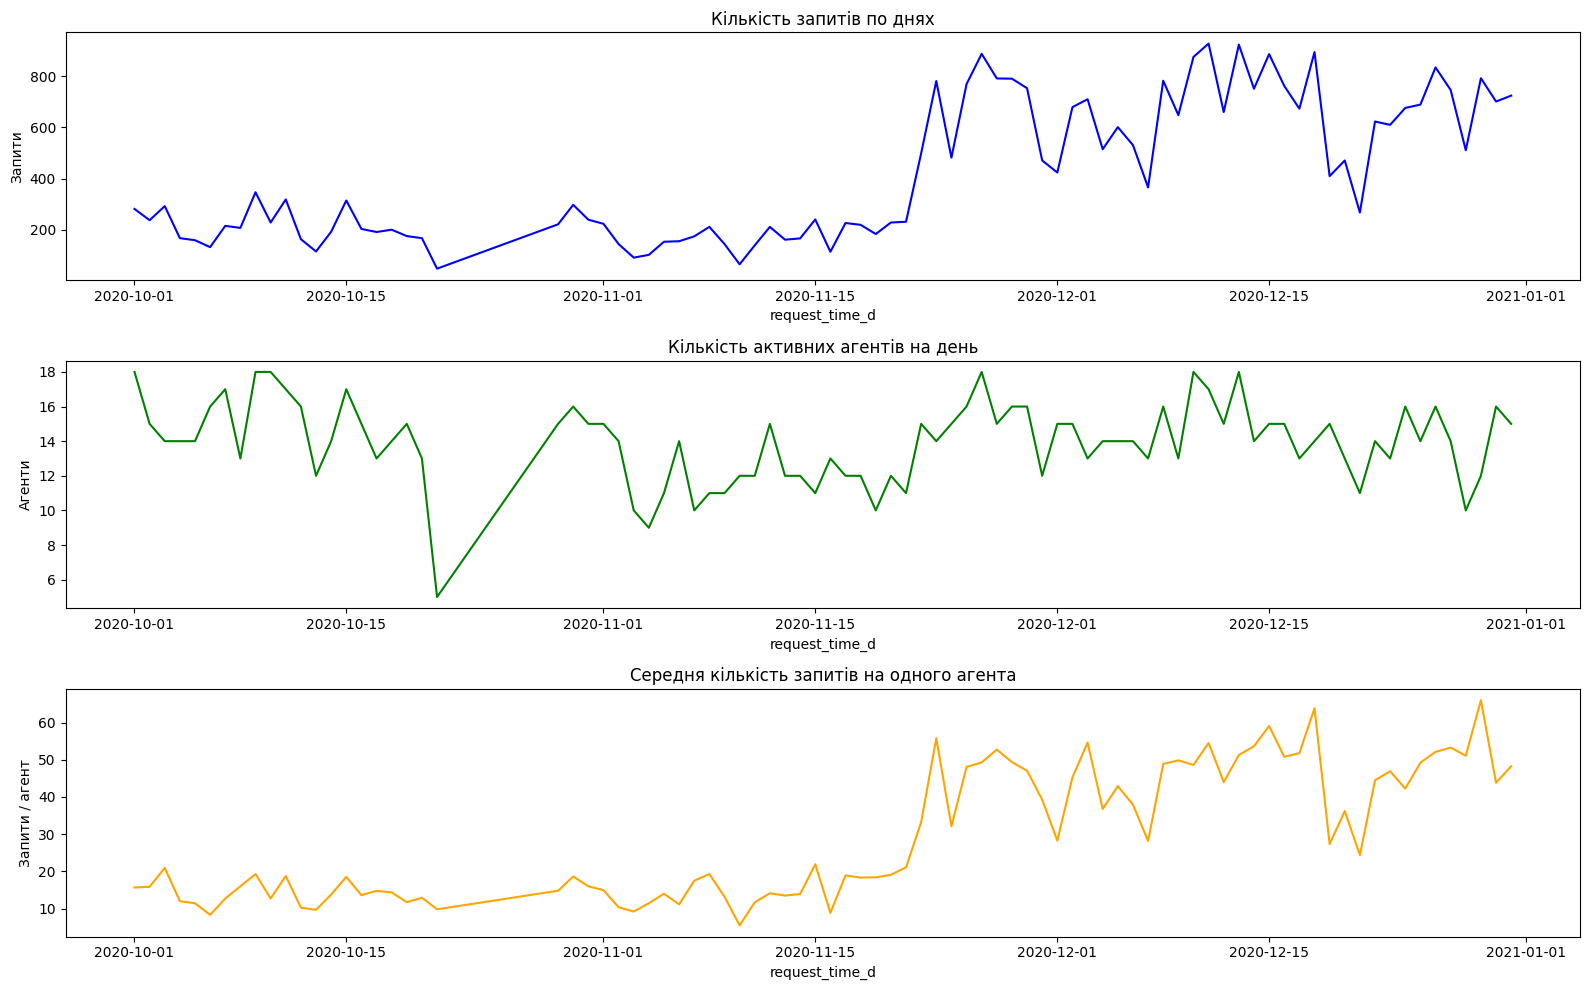

In [82]:

events['request_time_d'] = events['start_time'].dt.date


daily_statistics =events.groupby('request_time_d').agg(
    total_requests=('id_request', 'count'),
    working_moderator=('moderator', pd.Series.nunique),
    total_handling_time_mins=('handling_time_mins', 'sum')
).reset_index()


daily_statistics['requests_per_moderator'] = daily_statistics['total_requests'] / daily_statistics['working_moderator']
daily_statistics['avg_handling_time_per_moderator'] = daily_statistics['total_handling_time_mins'] / daily_statistics['working_moderator']


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))

plt.subplot(3, 1, 1)
sns.lineplot(data=daily_statistics, x='request_time_d', y='total_requests', color='blue')
plt.title("Кількість запитів по днях")
plt.ylabel("Запити")

plt.subplot(3, 1, 2)
sns.lineplot(data=daily_statistics, x='request_time_d', y='working_moderator', color='green')
plt.title("Кількість активних агентів на день")
plt.ylabel("Агенти")

plt.subplot(3, 1, 3)
sns.lineplot(data=daily_statistics, x='request_time_d', y='requests_per_moderator', color='orange')
plt.title("Середня кількість запитів на одного агента")
plt.ylabel("Запити / агент")


plt.tight_layout()
plt.show()

#### Проаналізувавши графіки, можна зробити висновок, що у випадку збільшення кількості запитів збільшуєтсья навантаження на одного агента. У випадку, коли навантаженян на одного агента більше 50 запитів на день, то це говорить про перевантаження агентів, з чого випливає довгий час очікування запиту в черзі

In [85]:
avg_daily_requests = daily_statistics['total_requests'].mean()


desired_requests_per_moderator = 40


required_moderators = avg_daily_requests / desired_requests_per_moderator

print(f"Середня кількість запитів на день: {avg_daily_requests:.0f}")
print(f"Щоб кожен агент обробляв не більше {desired_requests_per_moderator} запитів, потрібно ≈ {required_moderators:.1f} агентів.")

Середня кількість запитів на день: 419
Щоб кожен агент обробляв не більше 40 запитів, потрібно ≈ 10.5 агентів.


#### Так, як після середини листопада видно різкий скачок кількості запитів (який не понижався до рівня бажаного навантаження на агента на день) і саме в подальшому проміжку видно перенавантаження агентів, слід додати ще агентів, або передивитися графік роботи

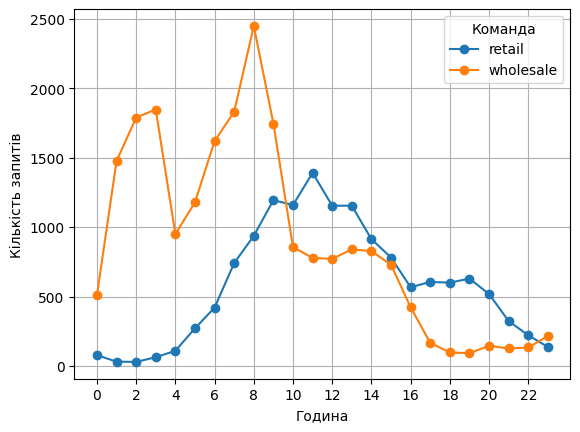

In [87]:
events["request_time_h"] = events["request_time"].dt.hour

for team, group in events.groupby("team"):
    hourly_counts = group.groupby("request_time_h").size()
    plt.plot(hourly_counts.index, hourly_counts.values, label=team, marker='o')

plt.ylabel('Кількість запитів')
plt.xlabel('Година')
plt.legend(title="Команда")
plt.xticks(range(0, 24, 2))
plt.grid(True)
plt.show()

Виходячи з побудованого графіку, можна припустити, що оптимальним графіком роботи для команди, виходячи з кілкьості створених запитів, для

*   команди retail є в рамках з 7:00 до 19:00
*   команди wholeasle є в рамках з 00:30 до 10:00



### Враховуючи що пікове навантаження обох команд приходить майже на одні й ті ж години, обʼєднання команд не принесе суттєвої користі для оптимізації часу відповіді на запити